# 📊 Exploratory Data Analysis (EDA) for Stock Market Analysis  
### *Analyzing historical stock data to understand trends, correlations, and risk factors*  

---

## **📌 Notebook Overview**  
This notebook performs a **detailed exploratory data analysis (EDA)** on **four major tech stocks**:  
✅ **Apple (`AAPL`)**  
✅ **Google (`GOOG`)**  
✅ **Microsoft (`MSFT`)**  
✅ **Amazon (`AMZN`)**  

The goal is to extract **meaningful financial insights** before building a stock price prediction model.  

---

## **📌 Steps Covered in This Notebook**  

### **1️⃣ Data Loading & Preprocessing**  
- Fetch historical stock price data using `yfinance`.  
- Format and clean the dataset for analysis.  

### **2️⃣ Descriptive Statistics & Data Overview**  
- Summary statistics (mean, min, max, standard deviation).  
- Checking for missing values.  

### **3️⃣ Visualizing Stock Trends**  
- **Closing Price Trends** 📈 *(How each stock's price has moved over time)*  
- **Trading Volume Trends** 📊 *(Market activity trends for each stock)*  

### **4️⃣ Analyzing Stock Returns & Risk**  
- **Daily Return Distributions** 🔄 *(How volatile each stock is over time)*  
- **Moving Averages (10-day, 20-day, 50-day)** *(Long-term price trends)*  
- **Risk vs. Expected Return Analysis** *(Comparing volatility vs. returns for each stock)*  

### **5️⃣ Correlation Analysis & Market Insights**  
- **Stock Closing Price Correlation Heatmap** *(How stock prices move together)*  
- **Stock Daily Return Correlation Heatmap** *(How stock returns are related)*  
- **Pairwise Stock Return Comparisons (PairGrid & Scatterplots)** *(Deeper insights into stock relationships)*  

---

## **📌 Objective**  
This analysis helps:  
✅ Identify **historical stock trends** before forecasting.  
✅ Measure **volatility, risk, and correlation** between stocks.  
✅ Provide insights for **predictive modeling & investment strategies**.  

---


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display



## 📌 Data Loading & Preprocessing  

This section ensures that our stock data is correctly loaded, structured, and clean for further analysis.  

### **✅ Loading Stock Data**  
We import **historical stock prices** from `stock_data.csv` and verify successful loading.  

### **📊 Dataset Overview**  
- **1000 rows** and **7 columns** (`Date`, `Ticker`, `Open`, `High`, `Low`, `Close`, `Volume`).  
- **All numerical data is in float64/int64 format**, with `Date` and `Ticker` as object types.  

### **📈 Summary Statistics**  
- **Mean closing price:** `$251.10` | **Max:** `$464.85` | **Min:** `$132.08`.  
- **High volatility** with a **standard deviation of $101.38**.  
- **Maximum trading volume:** ~318 million shares in a day.  

### **🔍 Missing Values Check**  
- ✅ **No missing values found.** The dataset is clean and ready for analysis.  


In [7]:
# Set visualization styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Define the file path for loading stock data
data_path = "/Users/adityaiyer/Desktop/APPLE_SMA/Data/stock_data.csv"

# Check if the file exists before loading
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print("✅ Stock data successfully loaded!")
else:
    raise FileNotFoundError(f"❌ Error: The file {data_path} was not found.")

# Display the first few rows of the dataset
display(df)

# Show dataset information (data types, missing values)
print("\n📊 Dataset Overview:")
print(df.info())

# Display summary statistics for numerical columns
print("\n📈 Summary Statistics:")
display(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\n🔍 Missing Values in Dataset:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found.")



✅ Stock data successfully loaded!


,Date,Ticker,Open,High,Low,Close,Volume
0,2024-03-05,AAPL,169.957503,171.231486,168.822861,169.320511,95132400
1,2024-03-05,AMZN,176.929993,176.929993,173.300003,174.119995,37228300
2,2024-03-05,GOOG,132.264771,133.540187,131.079029,133.301041,28447600
3,2024-03-05,MSFT,410.823486,411.111297,397.604432,399.599182,26919200
4,2024-03-06,AAPL,170.256065,170.435227,167.887245,168.325180,68587700
...,...,...,...,...,...,...,...
995,2025-03-03,MSFT,398.820007,398.820007,386.160004,388.489990,23007700
996,2025-03-04,AAPL,237.710007,240.070007,234.679993,235.929993,53724800
997,2025-03-04,AMZN,200.110001,206.800003,197.429993,203.800003,60714200
998,2025-03-04,GOOG,167.940002,175.164993,167.539993,172.610001,30667900



📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1000 non-null   object 
 1   Ticker  1000 non-null   object 
 2   Open    1000 non-null   float64
 3   High    1000 non-null   float64
 4   Low     1000 non-null   float64
 5   Close   1000 non-null   float64
 6   Volume  1000 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 54.8+ KB
None

📈 Summary Statistics:


,Open,High,Low,Close,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,251.105837,253.427591,248.646846,251.103028,3.374622e+07
std,101.453775,102.052740,100.618534,101.388051,2.368860e+07
min,132.264771,133.540187,131.079029,132.085403,6.809800e+06
25%,177.895268,179.517461,176.142814,178.149994,1.769775e+07
50%,204.556158,208.099998,202.169998,206.665421,2.839355e+07
75%,289.279820,293.005748,288.260285,290.646660,4.230888e+07
max,464.297590,465.639777,461.772294,464.854340,3.186799e+08



🔍 Missing Values in Dataset:
No missing values found.


## 📌 Stock Closing Prices Over Time  

This section visualizes the **closing price trends** for the four major tech stocks:  
✅ **Apple (`AAPL`)**  
✅ **Amazon (`AMZN`)**  
✅ **Google (`GOOG`)**  
✅ **Microsoft (`MSFT`)**  

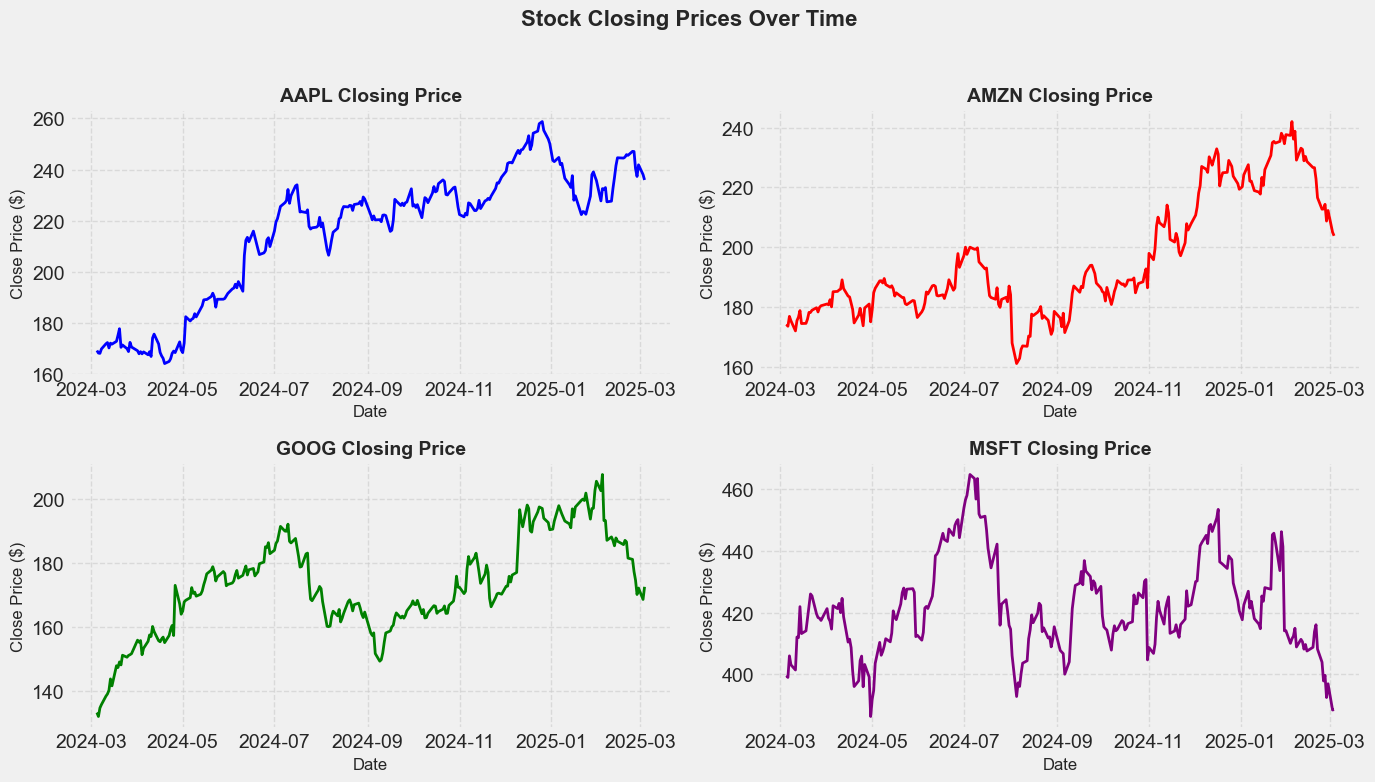

In [8]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Set Date as the index for time-series plots
df.set_index("Date", inplace=True)

# Define stock tickers for iteration
tickers = df["Ticker"].unique()

# Create a 2x2 grid for visualizing stock closing prices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
fig.suptitle("Stock Closing Prices Over Time", fontsize=16, fontweight="bold")

# Define colors for each stock
colors = ["blue", "red", "green", "purple"]

# Plot closing prices for each stock
for i, ticker in enumerate(tickers):
    subset = df[df["Ticker"] == ticker]
    axes[i // 2, i % 2].plot(subset.index, subset["Close"], color=colors[i], linewidth=2)
    axes[i // 2, i % 2].set_title(f"{ticker} Closing Price", fontsize=14, fontweight="bold")
    axes[i // 2, i % 2].set_xlabel("Date", fontsize=12)
    axes[i // 2, i % 2].set_ylabel("Close Price ($)", fontsize=12)
    axes[i // 2, i % 2].grid(True, linestyle="--", alpha=0.6)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **📈 Insights from the Visualization**  
- **All four stocks exhibit an overall upward trend**, indicating **strong market performance** over the period.  
- **AAPL & AMZN** show **steady growth**, peaking towards the end before experiencing a slight decline.  
- **GOOG** shows more **fluctuations** with periodic dips and recoveries.  
- **MSFT reached the highest price levels (~$460)** but also **experienced the most volatility**.  

### **📌 Key Observations**
- Stocks exhibit **strong seasonal trends** and **price corrections** at different points.  
- **Recent declines** suggest possible market corrections or external influences.  
- Understanding these trends helps in **predicting stock behavior** for future investments.  

📌 **Next, we analyze trading volume trends to assess market activity.** 🚀  


## 📌 Trading Volume Trends Over Time  

This section analyzes the **trading volume trends** for the four major tech stocks:  
✅ **Apple (`AAPL`)**  
✅ **Amazon (`AMZN`)**  
✅ **Google (`GOOG`)**  
✅ **Microsoft (`MSFT`)**  



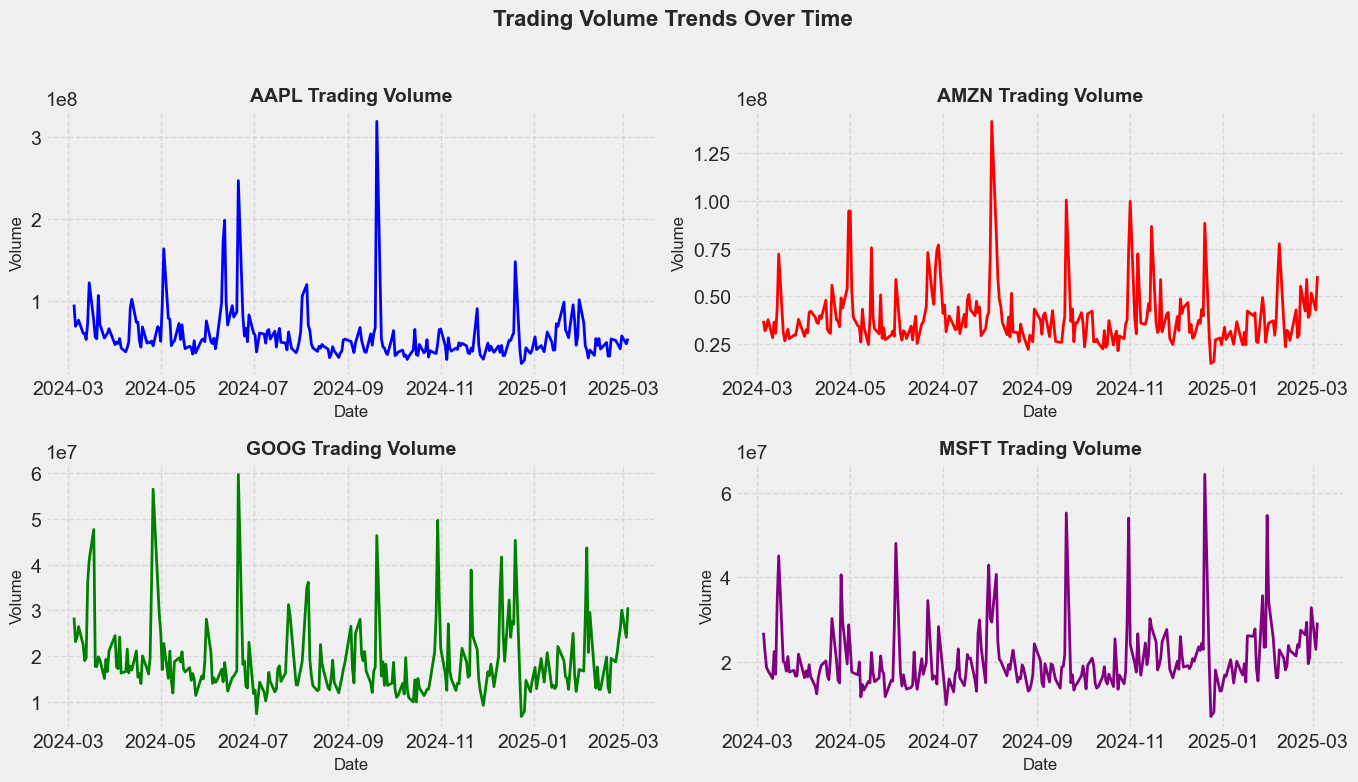

In [25]:
# Create a 2x2 grid for visualizing trading volume trends
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
fig.suptitle("Trading Volume Trends Over Time", fontsize=16, fontweight="bold")

# Define colors for each stock
colors = ["blue", "red", "green", "purple"]

# Plot trading volume for each stock
for i, ticker in enumerate(tickers):
    subset = df[df["Ticker"] == ticker]
    axes[i // 2, i % 2].plot(subset.index, subset["Volume"], color=colors[i], linewidth=2)
    axes[i // 2, i % 2].set_title(f"{ticker} Trading Volume", fontsize=14, fontweight="bold")
    axes[i // 2, i % 2].set_xlabel("Date", fontsize=12)
    axes[i // 2, i % 2].set_ylabel("Volume", fontsize=12)
    axes[i // 2, i % 2].grid(True, linestyle="--", alpha=0.6)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **📊 Insights from the Visualization**  
- **All four stocks exhibit periodic spikes in trading volume**, indicating high market activity on specific days.  
- **AAPL & AMZN** show **sharp volume surges**, possibly during earnings reports or major announcements.  
- **GOOG & MSFT** have relatively stable trading volumes but still show **occasional peaks**.  

### **📌 Key Observations**  
- Higher trading volume usually correlates with **price volatility**, suggesting possible investor reactions to news.  
- **Volume spikes in late 2024 suggest major events**, such as product launches or economic shifts.  
- Monitoring volume trends helps in **identifying market sentiment shifts and potential trading opportunities**.  

📌 **Next, we analyze stock return distributions and risk factors.** 🚀  


## 📌 Stock Prices with Moving Averages  

This section analyzes **short-term and long-term trends** using **moving averages** for:  
✅ **Apple (`AAPL`)**  
✅ **Amazon (`AMZN`)**  
✅ **Google (`GOOG`)**  
✅ **Microsoft (`MSFT`)**  

### **📈 What Moving Averages Show**  
- **10-Day MA (Orange)** → Short-term trends, reacts quickly to price changes.  
- **20-Day MA (Red)** → Medium-term trend indicator.  
- **50-Day MA (Green)** → Long-term trend, smooths out price fluctuations.  



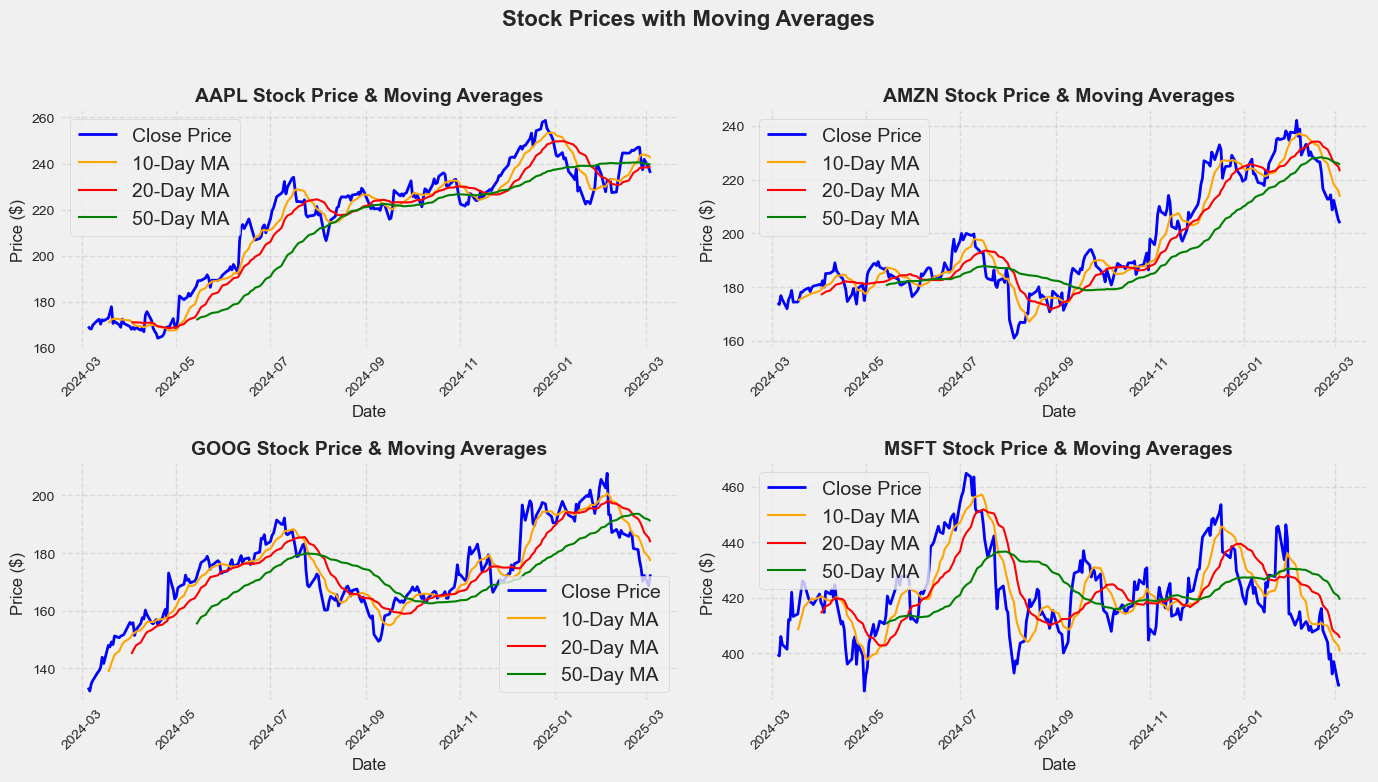

In [27]:

# Define moving average periods
ma_days = [10, 20, 50]

# Calculate moving averages and add new columns to df
for ma in ma_days:
    df[f"MA_{ma}"] = df.groupby("Ticker")["Close"].transform(lambda x: x.rolling(window=ma).mean())

# Create a 2x2 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
fig.suptitle("Stock Prices with Moving Averages", fontsize=16, fontweight="bold")

# Define colors for moving averages
colors = {10: "orange", 20: "red", 50: "green"}

# Plot each stock's price with moving averages
for i, ticker in enumerate(tickers):
    subset = df[df["Ticker"] == ticker]
    
    # Plot closing price
    axes[i // 2, i % 2].plot(subset.index, subset["Close"], label="Close Price", color="blue", linewidth=2)
    
    # Plot moving averages
    for ma in ma_days:
        axes[i // 2, i % 2].plot(subset.index, subset[f"MA_{ma}"], label=f"{ma}-Day MA", color=colors[ma], linewidth=1.5)

    # Formatting
    axes[i // 2, i % 2].set_title(f"{ticker} Stock Price & Moving Averages", fontsize=14, fontweight="bold")
    axes[i // 2, i % 2].set_xlabel("Date", fontsize=12)
    axes[i // 2, i % 2].set_ylabel("Price ($)", fontsize=12)
    axes[i // 2, i % 2].tick_params(axis="x", rotation=45, labelsize=10)
    axes[i // 2, i % 2].tick_params(axis="y", labelsize=10)
    axes[i // 2, i % 2].grid(True, linestyle="--", alpha=0.6)
    axes[i // 2, i % 2].legend()

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **📊 Insights from the Visualization**  
- **When short-term MAs cross above long-term MAs**, it signals a **bullish trend (buy signal)**.  
- **When short-term MAs cross below long-term MAs**, it indicates a **bearish trend (sell signal)**.  
- **AAPL & AMZN show clear uptrends**, with MAs aligning upward.  
- **GOOG & MSFT show volatility**, with multiple crossovers indicating uncertain trends.  

### **📌 Key Observations**  
- **Stocks in uptrends** tend to stay above their 50-day MA.  
- **Crossovers confirm potential trend reversals**—useful for trading decisions.  
- Moving averages help identify **support and resistance levels** for stock prices.  

## 📌 Daily Return Distribution of Stocks  

This section analyzes the **distribution of daily stock returns** for:  
✅ **Apple (`AAPL`)**  
✅ **Amazon (`AMZN`)**  
✅ **Google (`GOOG`)**  
✅ **Microsoft (`MSFT`)**  

### **📈 What This Shows**  
- **Histogram + KDE (Kernel Density Estimation)** visualize the **frequency of daily returns**.  
- Helps assess **volatility** and whether returns follow a **normal distribution**.  



/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

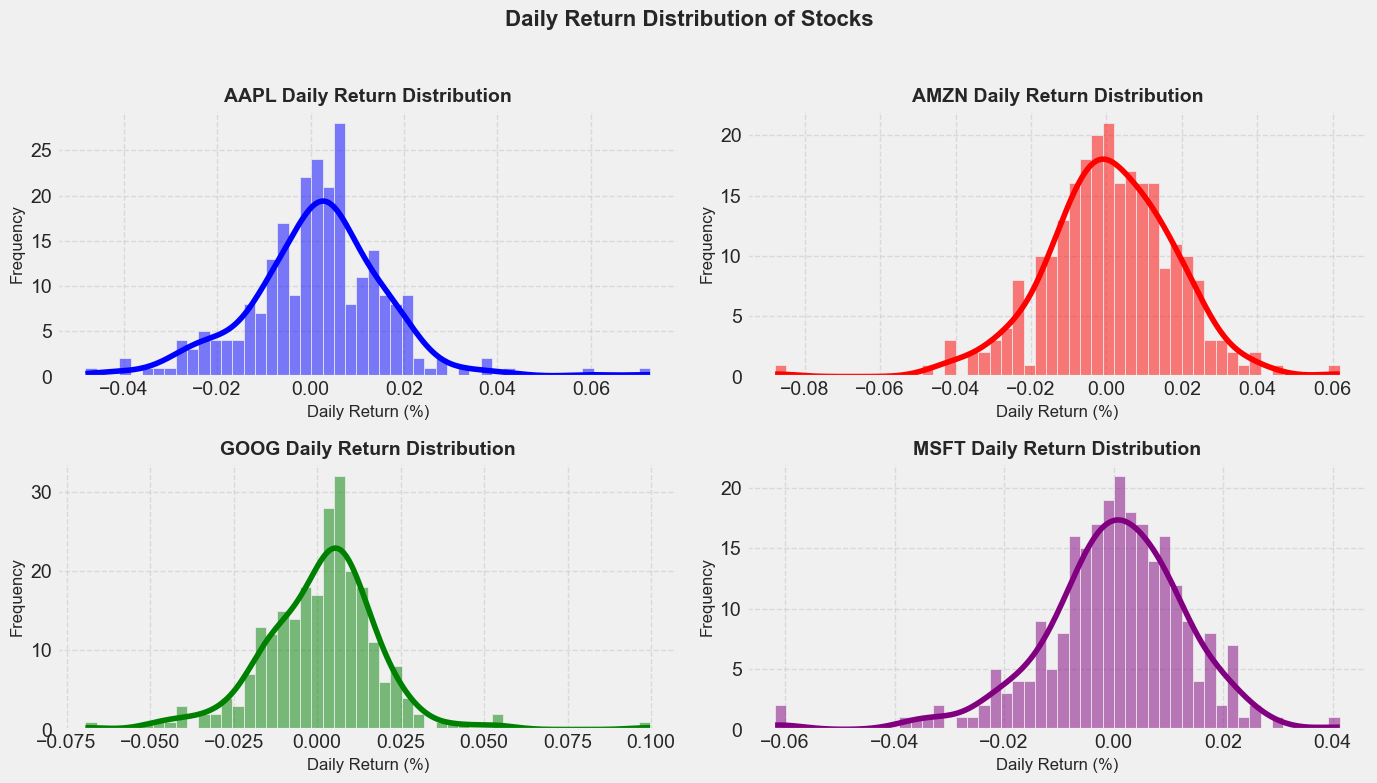

In [28]:
# Calculate daily returns for each stock
df["Daily Return"] = df.groupby("Ticker")["Close"].pct_change()

# Create a 2x2 grid for visualizing daily return distributions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
fig.suptitle("Daily Return Distribution of Stocks", fontsize=16, fontweight="bold")

# Define colors for each stock
colors = ["blue", "red", "green", "purple"]

# Plot histogram for each stock
for i, ticker in enumerate(tickers):
    subset = df[df["Ticker"] == ticker]
    sns.histplot(subset["Daily Return"].dropna(), bins=50, kde=True, color=colors[i], ax=axes[i // 2, i % 2])

    axes[i // 2, i % 2].set_title(f"{ticker} Daily Return Distribution", fontsize=14, fontweight="bold")
    axes[i // 2, i % 2].set_xlabel("Daily Return (%)", fontsize=12)
    axes[i // 2, i % 2].set_ylabel("Frequency", fontsize=12)
    axes[i // 2, i % 2].grid(True, linestyle="--", alpha=0.6)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **📊 Insights from the Visualization**  
- **Most returns are centered around 0%**, meaning small daily price changes are most frequent.  
- **AAPL, GOOG, and MSFT** show a **near-normal distribution** with slight skewness.  
- **AMZN has heavier tails**, indicating **higher volatility and larger fluctuations**.  
- **Outliers (extreme positive/negative returns)** suggest occasional market shocks.  

### **📌 Key Observations**  
- Stocks with **wider distributions** have **higher risk & volatility**.  
- **AMZN appears more volatile**, while **AAPL & GOOG are relatively stable**.  
- A **normal return distribution suggests market efficiency**, while deviations hint at external factors.  


## 📌 AAPL vs MSFT - Daily Return Correlation  

This section examines the **relationship between daily returns** of:  
✅ **Apple (`AAPL`)**  
✅ **Microsoft (`MSFT`)**  

### **📈 What This Shows**  
- A **scatter plot with a regression line** represents the correlation between AAPL & MSFT daily returns.  
- **Histograms on top & right** show the distribution of returns for each stock individually.  



/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


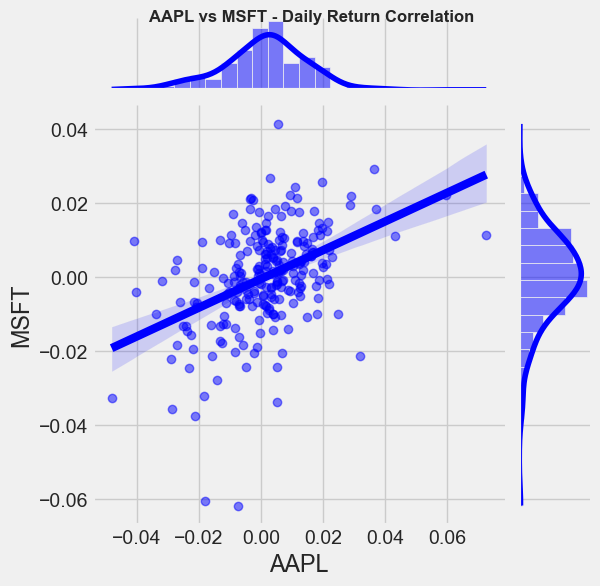

In [17]:
# Drop NaN values
returns_clean = df.pivot(columns="Ticker", values="Daily Return").dropna()

# Choose a stock for pairwise comparison (changeable)
stock_x = "AAPL"
stock_y = "MSFT"

# Create a scatter plot with regression line
g = sns.jointplot(x=stock_x, y=stock_y, data=returns_clean, kind="reg", color="blue", scatter_kws={'alpha': 0.5})

# Improve title readability
g.fig.suptitle(f"{stock_x} vs {stock_y} - Daily Return Correlation", fontsize=12, fontweight="bold")
plt.show()


### **📊 Insights from the Visualization**  
- The **positive slope of the regression line** suggests a **direct relationship**—when AAPL rises, MSFT tends to rise as well.  
- The **correlation is not perfect**, as points are scattered, indicating **some level of independent movement**.  
- **Denser points near the center** show that most daily returns are small, with fewer extreme values.  

### **📌 Key Observations**  
- **AAPL & MSFT are positively correlated**, meaning they tend to move in the same direction.  
- This is expected as both are **tech sector leaders**, influenced by similar market conditions.  
- **However, outliers exist**, indicating that some external factors affect each stock differently.  

📌 **Next, we analyze overall stock correlations using a heatmap.** 🚀  


## 📌 Stock Daily Return Pairwise Analysis  

This section visualizes the **pairwise relationships between daily stock returns** for:  
✅ **Apple (`AAPL`)**  
✅ **Amazon (`AMZN`)**  
✅ **Google (`GOOG`)**  
✅ **Microsoft (`MSFT`)**  

### **📈 What This Shows**  
- **Diagonal plots** → Histograms of each stock’s daily returns.  
- **Upper triangle** → Scatter plots showing how stock returns relate to each other.  
- **Lower triangle** → Kernel Density Estimation (KDE) plots highlighting joint distributions.  

/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

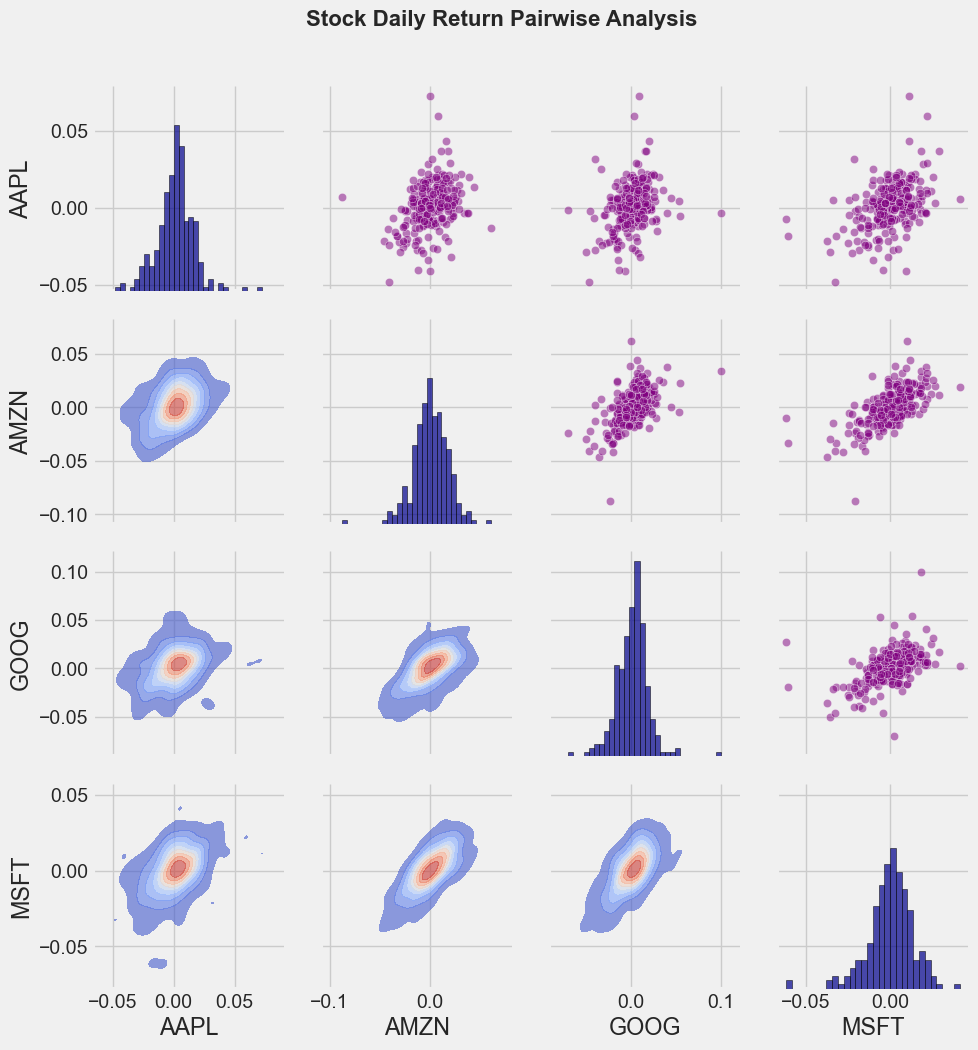

In [29]:
# Extract daily returns again (if not defined)
tech_rets = df.pivot(columns="Ticker", values="Daily Return").dropna()

# Drop NaN values
tech_rets_clean = tech_rets.dropna()

# Create a customized PairGrid
return_fig = sns.PairGrid(tech_rets_clean)

# Customize upper triangle with scatter plots
return_fig.map_upper(sns.scatterplot, color="purple", alpha=0.5)

# Customize lower triangle with KDE density plots
return_fig.map_lower(sns.kdeplot, cmap="coolwarm", fill=True, alpha=0.6)

# Customize diagonal with histograms
return_fig.map_diag(plt.hist, bins=30, edgecolor="black", alpha=0.7, color="darkblue")

# Improve layout and title
return_fig.fig.suptitle("Stock Daily Return Pairwise Analysis", fontsize=16, fontweight="bold", y=1.05)

plt.show()


### **📊 Insights from the Visualization**  
- **Tighter scatter clusters** indicate **stronger correlation**, while dispersed points suggest weaker relationships.  
- **KDE plots reveal the probability density**, showing where most return values lie.  
- **AAPL, AMZN, and MSFT exhibit moderate positive correlations**, suggesting similar market influences.  
- **GOOG & AMZN have some independence**, indicating different price movement patterns.  

### **📌 Key Observations**  
- Stocks in the **same sector (tech) tend to move together**, though some have unique trends.  
- **Diverging KDE distributions suggest different risk-return profiles** for certain stocks.  
- This analysis helps in **portfolio diversification**, identifying which stocks move together vs. independently.  

## 📌 Stock Closing Price Pairwise Analysis  

This section visualizes **how stock closing prices are related** across:  
✅ **Apple (`AAPL`)**  
✅ **Amazon (`AMZN`)**  
✅ **Google (`GOOG`)**  
✅ **Microsoft (`MSFT`)**  

### **📈 What This Shows**  
- **Diagonal plots** → Histograms showing the distribution of each stock’s closing price.  
- **Upper triangle** → Scatter plots visualizing the relationship between different stock prices.  
- **Lower triangle** → Kernel Density Estimation (KDE) plots showing joint probability density.  



/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityaiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

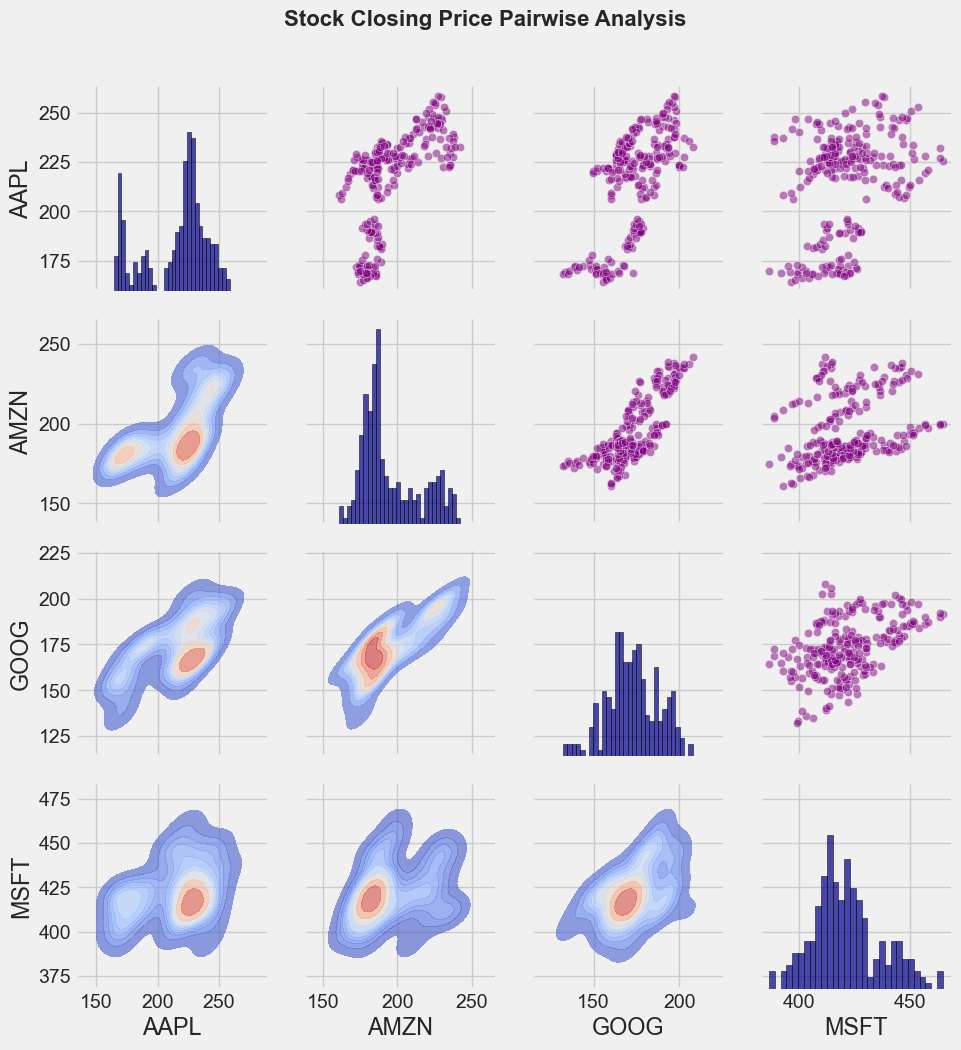

In [22]:
# Drop NaN values
closing_df_clean = closing_prices.dropna()

# Create a customized PairGrid for closing prices
returns_fig = sns.PairGrid(closing_df_clean)

# Customize upper triangle with scatter plots
returns_fig.map_upper(sns.scatterplot, color="purple", alpha=0.5)

# Customize lower triangle with KDE density plots
returns_fig.map_lower(sns.kdeplot, cmap="coolwarm", fill=True, alpha=0.6)

# Customize diagonal with histograms
returns_fig.map_diag(plt.hist, bins=30, edgecolor="black", alpha=0.7, color="darkblue")

# Improve layout and title
returns_fig.fig.suptitle("Stock Closing Price Pairwise Analysis", fontsize=16, fontweight="bold", y=1.05)

plt.show() 


### **📊 Insights from the Visualization**  
- **AAPL, AMZN, and MSFT show strong correlations**, indicating similar price movements.  
- **GOOG shows some independent behavior**, with a more spread-out scatter pattern.  
- KDE plots reveal **densely populated regions**, where most stock prices tend to cluster.  
- Certain scatter plots show **non-linear relationships**, hinting at **unique price trends** in different stocks.  

### **📌 Key Observations**  
- **Tech stocks tend to move together**, but some companies are more correlated than others.  
- Understanding these relationships helps in **portfolio risk management** and **diversification strategies**.  
- **Stocks with weaker correlations** may serve as hedges against market volatility.  

## 📌 Stock Daily Return Correlation Heatmap  

This heatmap visualizes the **correlation between daily stock returns** for:  
✅ **Apple (`AAPL`)**  
✅ **Amazon (`AMZN`)**  
✅ **Google (`GOOG`)**  
✅ **Microsoft (`MSFT`)**  

### **📈 What This Shows**  
- The **color intensity** represents the **strength of correlation** (red = strong, blue = weak).  
- **Diagonal values (1.00)** show that a stock is perfectly correlated with itself.  
- **Off-diagonal values** indicate how stocks move relative to each other.  



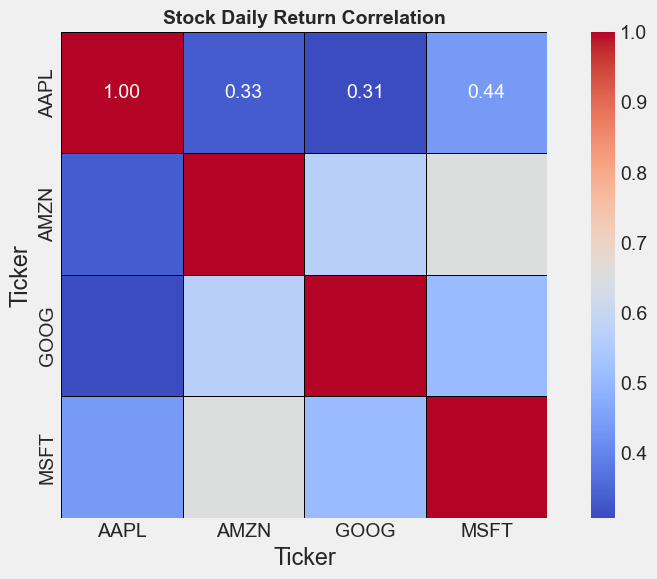

In [16]:
# Pivot the dataset to get daily returns for all stocks
returns = df.pivot(columns="Ticker", values="Daily Return")

# Compute correlation matrix of daily returns
returns_corr = returns.corr()

# Plot a heatmap of daily return correlations
plt.figure(figsize=(10, 6))
sns.heatmap(returns_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="black", square=True)

# Title and formatting
plt.title("Stock Daily Return Correlation", fontsize=14, fontweight="bold")
plt.show()


### **📊 Insights from the Visualization**  
- **AAPL & MSFT (0.44) are moderately correlated**, likely due to their shared tech sector influence.  
- **AAPL & GOOG (0.31) have weaker correlation**, suggesting different price movements.  
- **AMZN has lower correlations** with other stocks, indicating unique price behavior.  
- **No pair shows a correlation close to 1**, meaning diversification among these stocks is still beneficial.  

### **📌 Key Observations**  
- **Tech stocks tend to have moderate correlations**, but each has distinct price trends.  
- **A diversified portfolio with lower correlations reduces risk exposure**.  
- **Traders can use this data to hedge positions and manage risk effectively**.  

## 📌 Risk vs. Expected Return of Tech Stocks  

This scatter plot visualizes the **risk-return tradeoff** for major tech stocks:  
✅ **Apple (`AAPL`)**  
✅ **Amazon (`AMZN`)**  
✅ **Google (`GOOG`)**  
✅ **Microsoft (`MSFT`)**  

### **📈 What This Shows**  
- **X-axis (Expected Return):** The average return of each stock.  
- **Y-axis (Risk - Standard Deviation):** The stock’s volatility over time.  
- **Bubble Size & Color:** Higher risk stocks are represented with **larger, redder bubbles**, while lower risk stocks are **smaller and bluer**.  

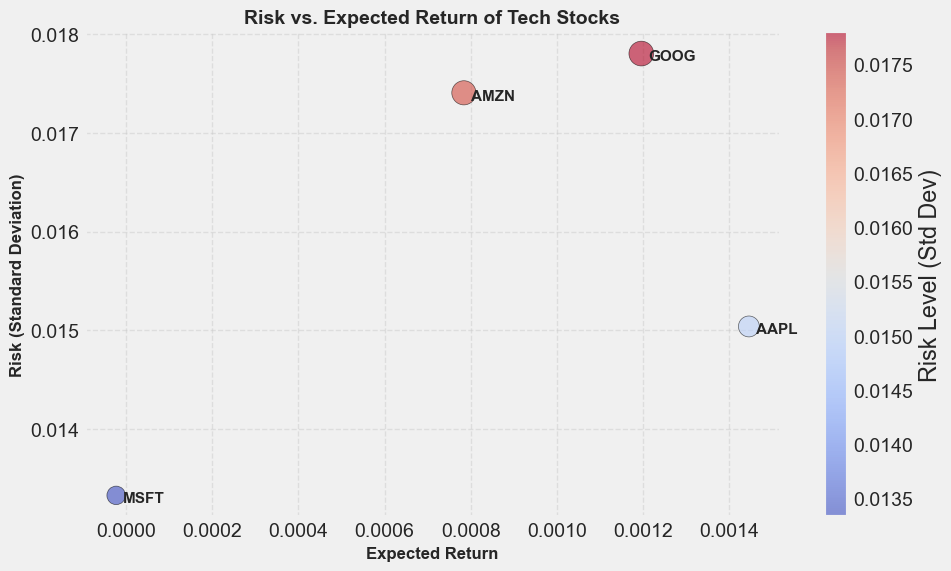

In [23]:
# Drop NaN values from returns
rets = tech_rets.dropna()

# Define bubble size dynamically based on risk (std deviation)
bubble_size = (rets.std() * 1000) ** 2  

# Set color based on risk (higher risk = more intense color)
colors = rets.std()  

# Scatter plot of Expected Return vs. Risk
plt.figure(figsize=(10, 6))
plt.scatter(rets.mean(), rets.std(), s=bubble_size, c=colors, cmap="coolwarm", alpha=0.6, edgecolors="black")

# Label axes
plt.xlabel("Expected Return", fontsize=12, fontweight="bold")
plt.ylabel("Risk (Standard Deviation)", fontsize=12, fontweight="bold")
plt.title("Risk vs. Expected Return of Tech Stocks", fontsize=14, fontweight="bold")

# Annotate each point with stock ticker
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(5, -5), textcoords="offset points", fontsize=11, fontweight="bold")

# Add colorbar to indicate risk levels
plt.colorbar(label="Risk Level (Std Dev)")

# Show plot
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### **📊 Insights from the Visualization**  
- **GOOG & AMZN have the highest risk** (largest standard deviation) but offer **higher expected returns**.  
- **AAPL has moderate risk and return**, making it a balanced investment choice.  
- **MSFT has the lowest risk and lowest return**, making it a **safer but less aggressive investment**.  

### **📌 Key Observations**  
- **Higher risk often corresponds to higher returns**, but also more volatility.  
- **MSFT is the least risky**, ideal for conservative investors.  
- **GOOG & AMZN carry more risk**, suitable for growth-oriented investors.  